<a href="https://colab.research.google.com/github/RajaNaresh1974/23CSBTB15/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fetch_openml(data_id=5)

{'data':      age sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
 0     75   0     190      80           91         193          371        174   
 1     56   1     165      64           81         174          401        149   
 2     54   0     172      95          138         163          386        185   
 3     55   0     175      94          100         202          380        179   
 4     75   0     190      80           88         181          360        177   
 ..   ...  ..     ...     ...          ...         ...          ...        ...   
 447   53   1     160      70           80         199          382        154   
 448   37   0     190      85          100         137          361        201   
 449   36   0     166      68          108         176          365        194   
 450   32   1     155      55           93         106          386        218   
 451   78   1     160      70           79         127          364        138   
 
      

In [3]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
car_data.details['version']

'2'

In [8]:
car_data.feature_names,car_data.target,car_data.categories

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 None)

In [9]:
car_data.target.value_counts()

,count
binaryClass,
P,1210
N,518


In [10]:
car_data=car_data.frame
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [11]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


<Axes: xlabel='binaryClass', ylabel='count'>

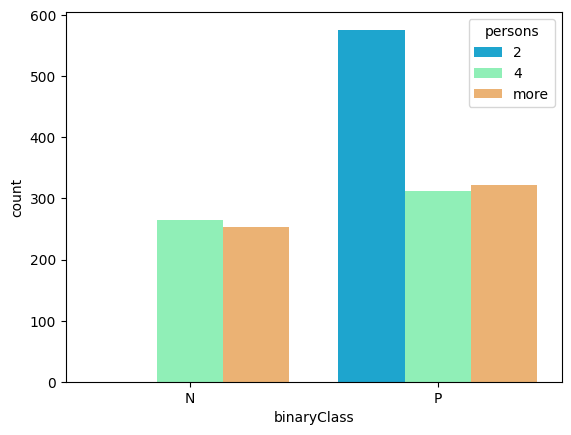

In [12]:
sns.countplot(x=car_data.binaryClass,hue='persons',data=car_data,palette='rainbow')

<Axes: xlabel='binaryClass', ylabel='count'>

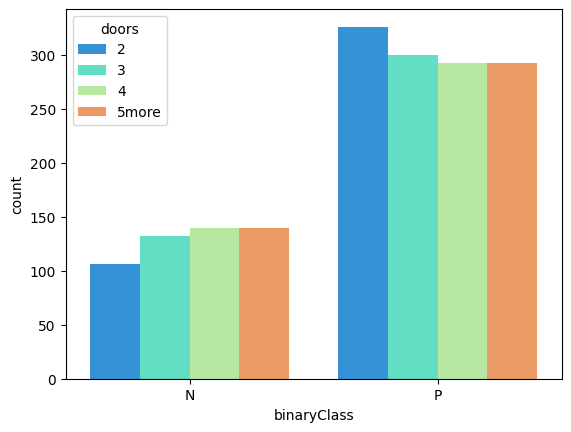

In [13]:
sns.countplot(x=car_data.binaryClass,hue='doors',data=car_data,palette='rainbow')

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data =train_test_split(car_data, test_size = 0.3,
                                        random_state=20)
#print('The size of training data is : {}\nThe size of testing data is : {}'.format(len(test_data) , len(test_data)))
car_data.shape, train_data.shape, test_data.shape


((1728, 7), (1209, 7), (519, 7))

In [15]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [16]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [17]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [18]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [19]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [20]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [21]:
car_train = train_data.drop('binaryClass', axis =1)
car_labels = train_data[['binaryClass']]

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
car_train_prepared.shape, car_labels_prepared.shape

((1209, 6), (1209,))

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [26]:
from sklearn.tree import export_text
text_representation = export_text(dt_clf,
                                  feature_names=list(car_train.columns))
print(text_representation)


|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [27]:
from sklearn.metrics import accuracy_score, classification_report,\
 confusion_matrix
preds = dt_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:\n{classification_report(car_labels_prepared, preds)}")

print(f"Confusion Matrix:\n{confusion_matrix(car_labels_prepared, preds)}")

Accuracy:1.0
ClassReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Confusion Matrix:
[[360   0]
 [  0 849]]


In [28]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

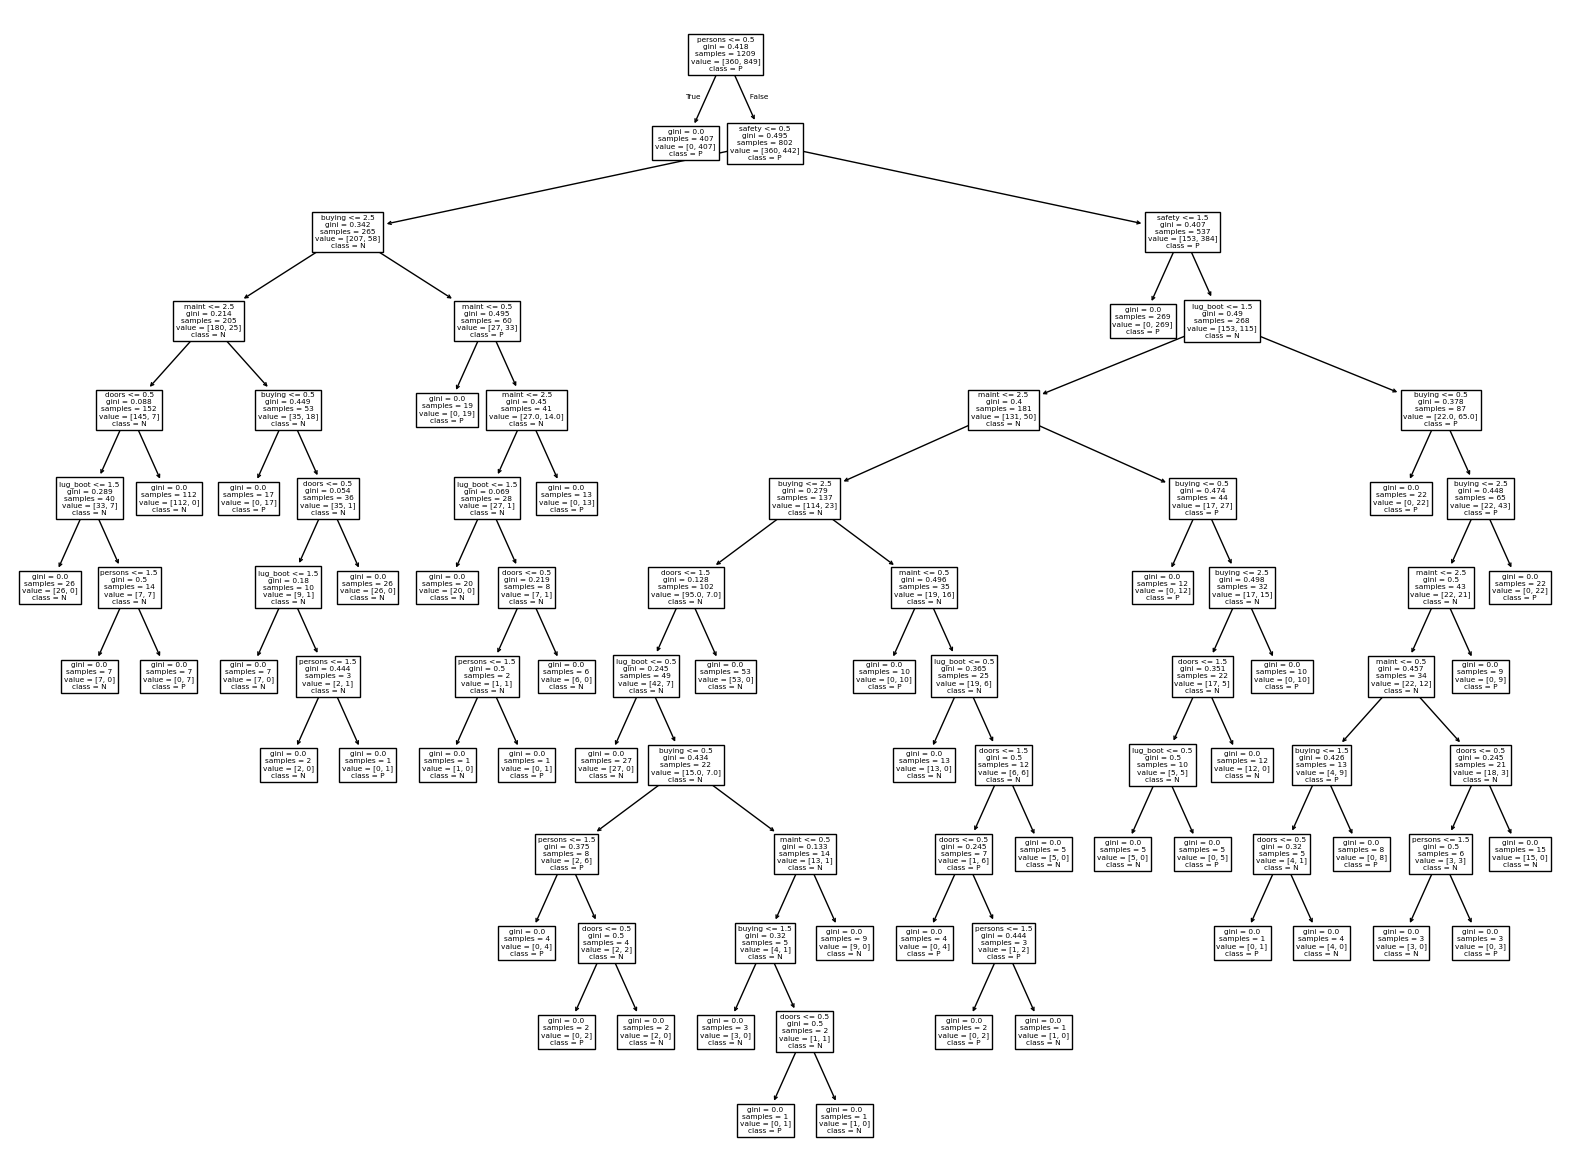

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names=car_train.columns,
          class_names=['N','P']);